This notebook was written and used on a local machine and doesn't require CUDA or CUDNN. This notebook plots a graph of the IOU metric. This graph will help us understand ways to effect the convergence of the Kmeans on the bounding boxes with IOU as metric.

## Installations and importations 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from mpl_toolkits import mplot3d

The graph is plotted by having one rectangle fixed with width and height at (R1_w, R1_h) and making the width and height of the other rectangle change from 0 to 1. The IOU is measured by coinciding the centres of the two rectangles.

In [2]:
R1_w = 0.5
R1_h = 0.5

## The IOU func 

In [3]:
def IOU(R2_w, R2_h):
    I = np.multiply(np.minimum(R1_w,R2_w), np.minimum(R1_h,R2_h))
    U = R1_w*R1_h + np.multiply(R2_w,R2_h) - I
    return np.divide(I, U)

## Create the (X,Y) point mesh and compute IOU over the mesh. 

In [4]:
R2_w = np.linspace(0, 1, 50)
R2_h = np.linspace(0, 1, 50)

R2_w, R2_h = np.meshgrid(R2_w, R2_h)
Z = IOU(R2_w, R2_h)

## Plotting 

<IPython.core.display.Javascript object>


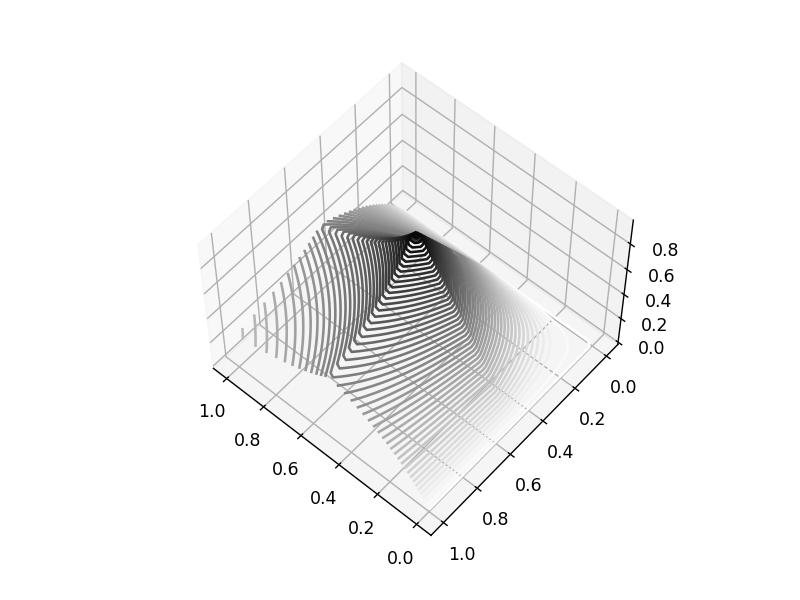

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(R2_w, R2_h, Z, 50, cmap='binary')